In [1]:
import numpy as np 
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('C:\\Users\\hajar\\Documents\\Data2\\training2.csv')
validation = pd.read_csv('C:\\Users\\hajar\\Documents\\Data2\\validation2.csv')
test = pd.read_csv('C:\\Users\\hajar\\Documents\\Data2\\test2.csv')

In [3]:
print(train.head())
print(validation.head())
print(test.head())

                                                text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3
                                                text  label
0  im feeling quite sad and sorry for myself but ...      0
1  i feel like i am still looking at a blank canv...      0
2                     i feel like a faithful servant      2
3                  i am just feeling cranky and blue      3
4  i can have for a treat or if i am feeling festive      1
                                                text  label
0  im feeling rather rotten so im not very ambiti...      0
1          im updating my blog because i feel shitty      0
2  i never make her separate from me because i do...      0
3  i left with my bouquet of red and yel

In [4]:
labels_dict = {0:'sadness', 1:'joy', 2:'love', 3:'anger', 4:'fear', 5:'surprise'}
train['description'] = train['label'].map(labels_dict )
train.head()

,text,label,description
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [5]:
train['description'].value_counts(normalize=True)

joy         0.335125
sadness     0.291625
anger       0.134937
fear        0.121063
love        0.081500
surprise    0.035750
Name: description, dtype: float64

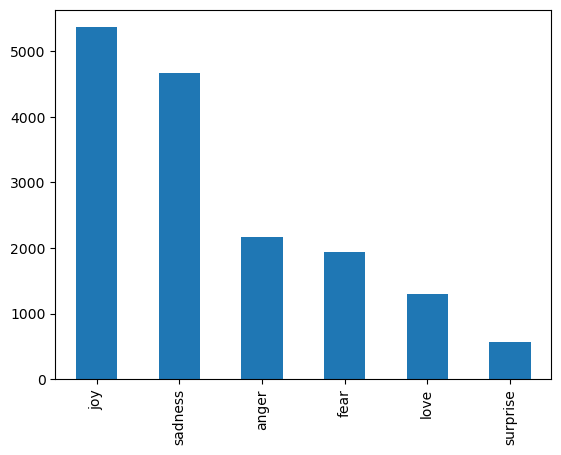

In [6]:
train['description'].value_counts().plot(kind='bar');


In [7]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hajar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
def text_cleaning(text):
    punctuation_removed = [char for char in text if char not in string.punctuation]
    p_join = ''.join(punctuation_removed)
    p_join_clean = [word for word in p_join.split() if word.lower() not in stopwords.words('english')]
    return p_join_clean



In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [10]:
# Apply text cleaning function to 'text' column of train and validation dataframes
train_claining = train['text'].apply(text_cleaning)
validation_claining = validation['text'].apply(text_cleaning)

# Add a new column called 'list' to train and validation dataframes
train['list'] = train_claining
validation['list'] = validation_claining

# Print the first 5 rows of both dataframes to verify the changes
print(train.head())
print(validation.head())

                                                text  label description  \
0                            i didnt feel humiliated      0     sadness   
1  i can go from feeling so hopeless to so damned...      0     sadness   
2   im grabbing a minute to post i feel greedy wrong      3       anger   
3  i am ever feeling nostalgic about the fireplac...      2        love   
4                               i am feeling grouchy      3       anger   

                                                list  
0                          [didnt, feel, humiliated]  
1  [go, feeling, hopeless, damned, hopeful, aroun...  
2  [im, grabbing, minute, post, feel, greedy, wrong]  
3  [ever, feeling, nostalgic, fireplace, know, st...  
4                                 [feeling, grouchy]  
                                                text  label  \
0  im feeling quite sad and sorry for myself but ...      0   
1  i feel like i am still looking at a blank canv...      0   
2                     i feel l

In [11]:
x_train, y_train = train['list'].values, train['label'].values
x_val, y_val = validation['list'].values, validation['label'].values
x_test, y_test = test['text'].values, test['label'].values

print(x_train[3])
print(x_val[3])
print(x_test[3])

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)


['ever', 'feeling', 'nostalgic', 'fireplace', 'know', 'still', 'property']
['feeling', 'cranky', 'blue']
i left with my bouquet of red and yellow tulips under my arm feeling slightly more optimistic than when i arrived
(16000,) (16000,)
(2000,) (2000,)


In [12]:
max_features = 2000

tokenizer = Tokenizer(num_words=max_features, oov_token="<OOV>")
tokenizer.fit_on_texts(x_train)
x_train_pad = tokenizer.texts_to_sequences(x_train)
x_train_pad = pad_sequences(x_train_pad, padding='post', truncating="post", maxlen=100)

vocab_size = len(tokenizer.word_index) + 1

x_val_pad = tokenizer.texts_to_sequences(x_val)
x_val_pad = pad_sequences(x_val_pad, padding='post', truncating="post", maxlen=100)

In [13]:
print(x_train_pad.shape, x_train_pad[0])
print(x_val_pad.shape, x_val_pad[0])

(16000, 100) [ 50   2 563   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
(2000, 100) [  5   3  62 155 234 110   1 420   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


In [14]:
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras import layers, Input
from tensorflow.keras.layers import  Flatten, GlobalMaxPooling1D, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding, Dense, LSTM, GRU, Conv1D, Bidirectional,  MaxPooling1D

In [15]:
embed_dim = 300

model1 = Sequential([
    Embedding(max_features, embed_dim, input_length=x_train_pad.shape[1]),
    Bidirectional(LSTM(156, dropout=0.2)),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dropout(0.2),
    Dense(64, activation = 'relu'),
    Dense(6, activation = 'softmax')
])
print(model1.summary())

model1.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 300)          600000    
                                                                 
 bidirectional (Bidirectiona  (None, 312)              570336    
 l)                                                              
                                                                 
 flatten (Flatten)           (None, 312)               0         
                                                                 
 dense (Dense)               (None, 128)               40064     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                        

In [16]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

history1 = model1.fit(x_train_pad, y_train, validation_data=(x_val_pad,y_val), epochs=10, batch_size=64)

Epoch 1/10
250/250 [==============================] - 297s 1s/step - loss: 1.0593 - accuracy: 0.5913 - val_loss: 0.4363 - val_accuracy: 0.8610
Epoch 2/10
250/250 [==============================] - 308s 1s/step - loss: 0.2787 - accuracy: 0.9041 - val_loss: 0.2627 - val_accuracy: 0.9015
Epoch 3/10
250/250 [==============================] - 309s 1s/step - loss: 0.1705 - accuracy: 0.9367 - val_loss: 0.2546 - val_accuracy: 0.9125
Epoch 4/10
250/250 [==============================] - 310s 1s/step - loss: 0.1315 - accuracy: 0.9489 - val_loss: 0.2530 - val_accuracy: 0.9130
Epoch 5/10
250/250 [==============================] - 315s 1s/step - loss: 0.1149 - accuracy: 0.9555 - val_loss: 0.2780 - val_accuracy: 0.9155
Epoch 6/10
250/250 [==============================] - 317s 1s/step - loss: 0.0968 - accuracy: 0.9604 - val_loss: 0.2467 - val_accuracy: 0.9185
Epoch 7/10
250/250 [==============================] - 313s 1s/step - loss: 0.0833 - accuracy: 0.9668 - val_loss: 0.2993 - val_accuracy: 0.9135

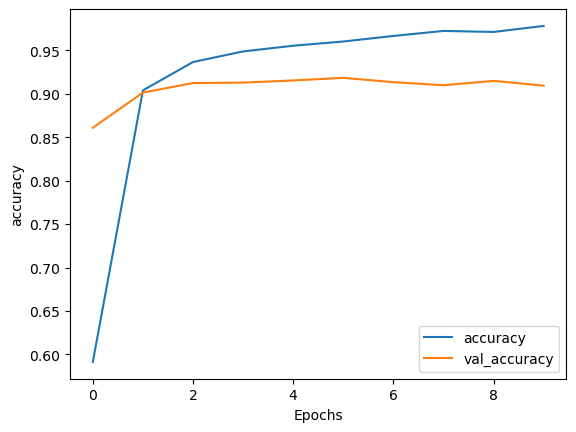

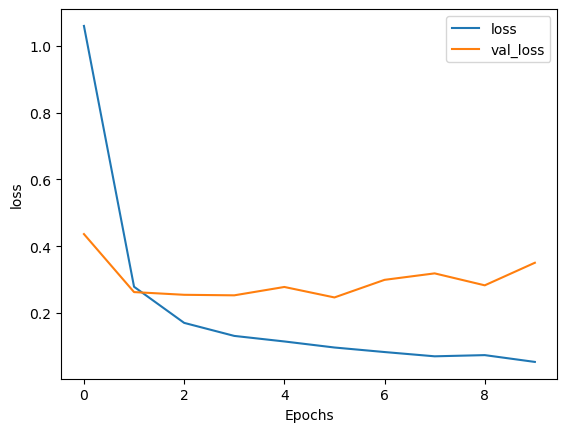

In [17]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, f'val_{metric}'])
    plt.show()
    
plot_graphs(history1, "accuracy")
plot_graphs(history1, "loss")

In [18]:
x_test_pad = tokenizer.texts_to_sequences(x_test)
x_test_pad = pad_sequences(x_test_pad, padding='post', truncating="post", maxlen=100)

#Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
t_results = model1.evaluate(x_test_pad , y_test, batch_size=32)

print("Test loss:{} and Test accuracy:{}%".format(round(t_results[0], 3), round(t_results[1]*100)))

Evaluate on test data
63/63 [==============================] - 4s 57ms/step - loss: 0.4561 - accuracy: 0.8875
Test loss:0.456 and Test accuracy:89%


In [19]:
y_pred =   np.argmax(model1.predict(x_test_pad), axis=1)
y_true = np.argmax(y_test, axis=1)
from sklearn import metrics
print(metrics.classification_report(y_pred, y_true))

63/63 [==============================] - 4s 46ms/step
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       603
           1       0.88      0.96      0.92       642
           2       0.79      0.74      0.76       168
           3       0.95      0.78      0.86       337
           4       0.77      0.91      0.84       190
           5       0.70      0.77      0.73        60

    accuracy                           0.89      2000
   macro avg       0.84      0.85      0.84      2000
weighted avg       0.89      0.89      0.89      2000

